In [6]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [15]:
SI_dist = pm.Gamma.dist(alpha=(1/(0.62**2)), beta=(1/(6.5 * 0.62 ** 2)))

In [16]:
x = np.arange(0, 21, 0.01)
pdf = np.exp(SI_dist.logp(x).eval())

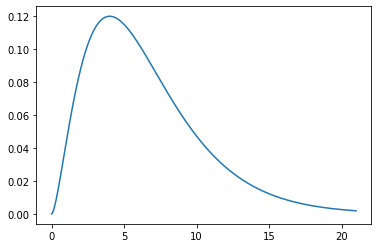

In [17]:
plt.plot(x, pdf)

In [19]:
def compute_R(growth_rate, alpha=(1/(0.62**2)), beta=(1/(6.5 * 0.62 ** 2))):
    def M(z):
        if z > beta:
            raise ValueError("invalid z")
        else:
            return (1 - (z/beta)) ** -alpha
    
    return 1/M(-(growth_rate - 1))

In [33]:
base_growth = 1.2
factor = 0.9

(compute_R(base_growth)  - compute_R(base_growth*factor)) / compute_R(base_growth)

0.4402446556691202

Text(0, 0.5, '$R$')

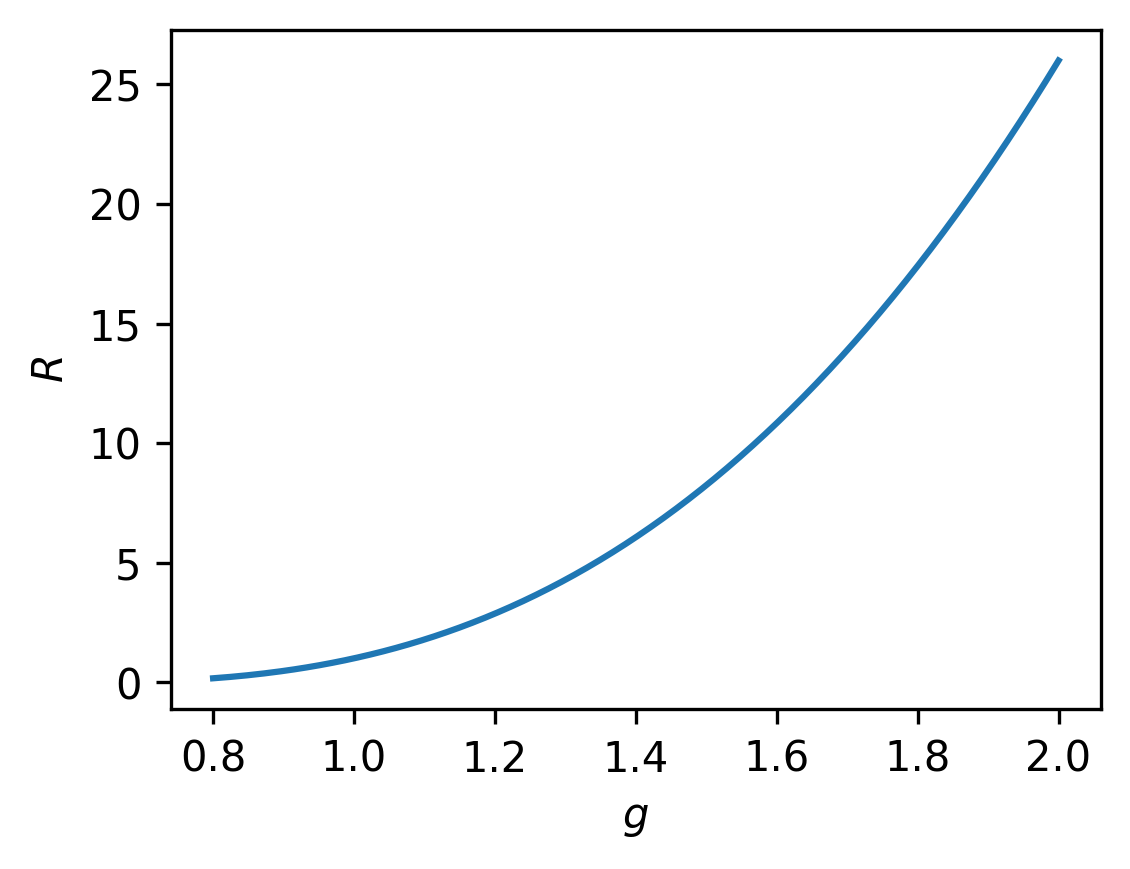

In [53]:
growth_rates = np.linspace(0.8, 2, num=200)
R_vals = [compute_R(g) for g in growth_rates]

plt.figure(figsize=(4, 3), dpi=300)
plt.plot(growth_rates, R_vals)
plt.xlabel("$g$")
plt.ylabel("$R$")

In [70]:
def compute_g(R, alpha=(1/(0.62**2)), beta=(1/(6.5 * 0.62 ** 2))):
    return beta * ((R ** (1/alpha)) - 1) + 1

Text(0, 0.5, '$g$')

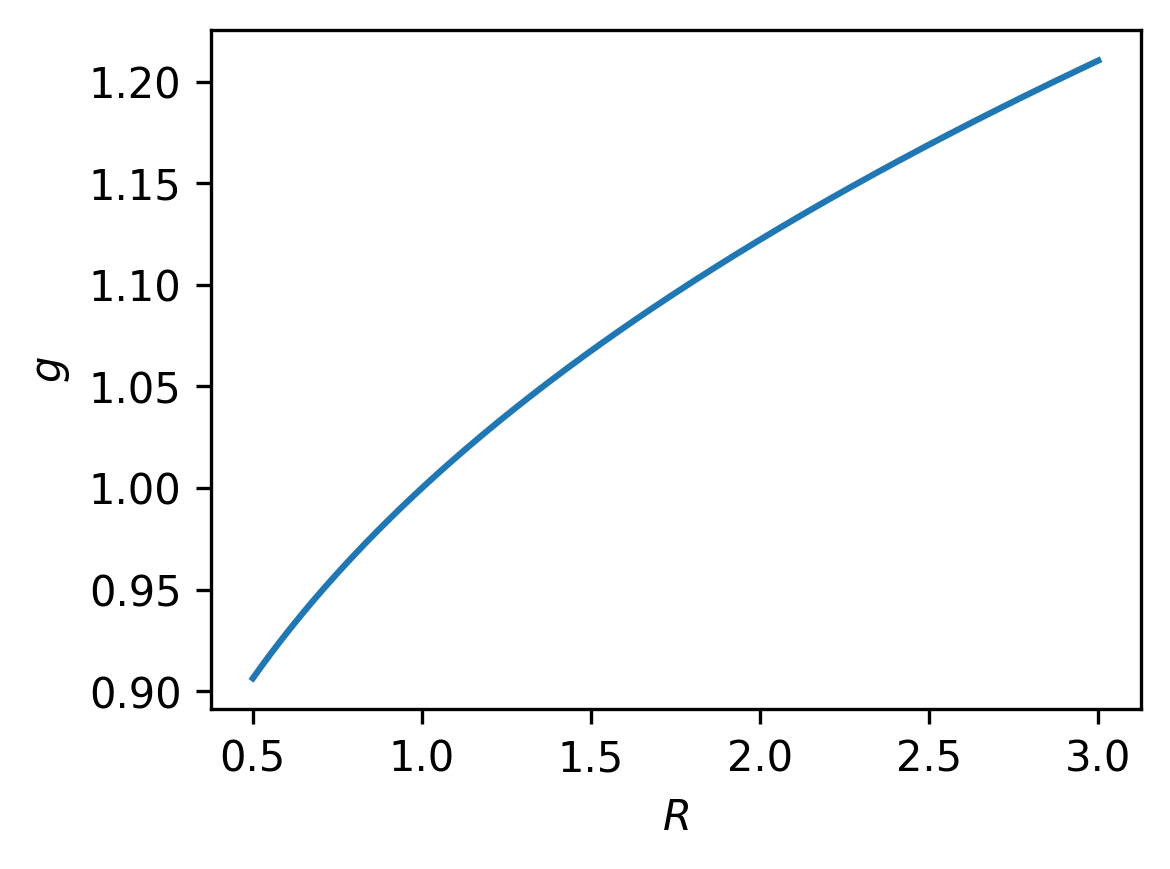

In [71]:
R_vals2 = np.linspace(0.5, 3, num=200)
g_vals2 = [compute_g(R) for R in R_vals2]

plt.figure(figsize=(4, 3), dpi=300)
plt.plot(R_vals2, g_vals2)
plt.xlabel("$R$")
plt.ylabel("$g$")